# Reversing Conway (Part 1)

The goal of this project is to reverse Conway's Game of Life on a 25 x 25 grid board. Conway's Game of Life is a "Cellular Automation" devised by John Conway. This game lives on a orthoganal grid and invovles a life state (1 or 0) at each point on a grid. This algorithm changes over "time" (iterations) based on an initial state and a certain set of rules. The rules followed in this project are as follows:

1. Overpopulation: if a living cell is surrounded by more than three living cells, it dies.
2. Stasis: if a living cell is surrounded by two or three living cells, it survives.
3. Underpopulation: if a living cell is surrounded by fewer than two living cells, it dies.
4. Reproduction: if a dead cell is surrounded by exactly three cells, it becomes a live cell.
    
Before jumping into the reversal of this game it would be wise to start with something more simple. In this part 1 we will start the algorithm for the forward direction. Also, let's start with a 5x5 board before moving on to the bigger board.

## Getting Started

In [1]:
import numpy as np
import random

The initial state is irrelevant so I'm just going to create this life generation function as follows... We'll generate a random number between 3 and 7. This will represent the number of cells to be initialized as alive (we can always change this later). Then I will randomize their location to a position between 0 and 24.

In [18]:
def startLife(a): # returns aPost
    numTerms = random.randint(3,10)
    startingPoints = []
    for term in range(numTerms):
        temp = random.randint(0,24)
        startingPoints.append(temp)
        
    for pointLoc in startingPoints:
        a[pointLoc]=1
    
    return a

In [19]:
def startLifeSuper():
    aPre = np.zeros(25)
    aPost = startLife(aPre)
    aMat = aPost.reshape(5,5)
    
    return aMat
    

Now we have a starting point. After looking at the four rules of the algorithm it is apparent that we update a position based on its neighbors. Lets make a function that returns a list of all of the adjacent cells' states given some cell location.


In [20]:
# Given a (x,y)
def surroundings(somePos):
    x = somePos[0]
    y = somePos[1]


    if (y ==0) and (x==0):#top left
        out = [aMat[y][x+1],
        aMat[y+1][x],
        aMat[y+1][x+1]]
        
        return out
        
        
    elif (y == 0) and (x ==4): # top right
        out = [
        aMat[y][x-1],
        aMat[y+1][x-1],
        aMat[y+1][x],
        ]
        
        return out
        
    elif y== 0: # just top
        out = [aMat[y][x+1],
        aMat[y][x-1],
        aMat[y+1][x-1],
        aMat[y+1][x],
        aMat[y+1][x+1]]
        
        return out
        
    elif (y ==4) and (x==0): # bottom left
        out = [aMat[y][x+1],
        aMat[y-1][x+1],
        aMat[y-1][x],
        ]
        
        return out
        
    elif (y==4) and (x == 4): # bottom right
        out = [
        aMat[y-1][x],
        aMat[y-1][x-1],
        aMat[y][x-1],
       ]
        
        return out
        
    elif y==4: # just bottom
        out = [aMat[y][x+1],
        aMat[y-1][x+1],
        aMat[y-1][x],
        aMat[y-1][x-1],
        aMat[y][x-1],]
        
        return out
        
    elif x ==0: # just left
        out = [aMat[y][x+1],
        aMat[y-1][x+1],
        aMat[y-1][x],
        aMat[y+1][x],
        aMat[y+1][x+1]]
        
        return out
    
    elif x ==4: # just right
        out = [
        aMat[y-1][x],
        aMat[y-1][x-1],
        aMat[y][x-1],
        aMat[y+1][x-1],
        aMat[y+1][x]]
        
        return out
        
    else: # any mid
        out = [aMat[y][x+1],
        aMat[y-1][x+1],
        aMat[y-1][x],
        aMat[y-1][x-1],
        aMat[y][x-1],
        aMat[y+1][x-1],
        aMat[y+1][x],
        aMat[y+1][x+1]]
                     
        return out
        

Now that we have a list of neighbors we can implement the four rules.

In [25]:
def grimReaper(somePos): # updates a position using surroundings based on the rules
    x = somePos[0]
    y = somePos[1]
    
    alive = aMat[y][x]
    surroundingLife = sum(surroundings((x,y)))
    
    # Overpopulation
    if (alive==1) and (surroundingLife > 3):
        alive = 0
    # Stasis
    elif (alive==1) and (1<surroundingLife<4):
        pass # alive = 1
    # Underpopulation
    elif (alive==1) and (surroundingLife<2):
        alive = 0
        
    # Reproduction
    elif (alive==0) and (surroundingLife==3):
        alive=1
    else:
        pass
    
    aMat[y][x]=alive
    
    

Let's try it out.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

import time

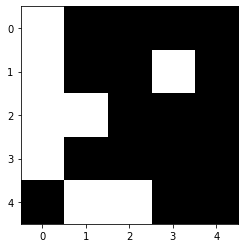

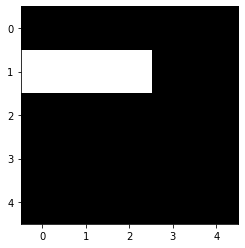

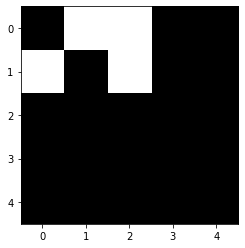

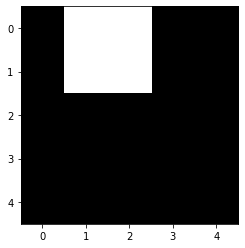

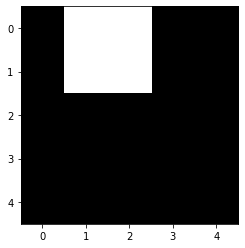

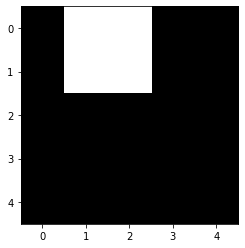

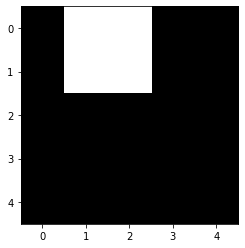

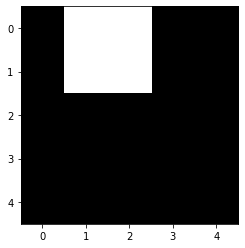

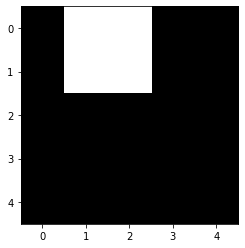

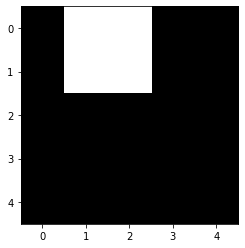

In [24]:
# lets do 10 iterations
aMat = startLifeSuper()

for k in range(10):
    plt.imshow(aMat, cmap="gray")
    plt.show()
    
    for i in range(5):
        for j in range(5):
            grimReaper((j,i))
            
    
    time.sleep(.5)

## Now on a 25x25 board

We need to update the previous code to work on a 25 x 25 dimension board.

In [11]:
# Given a (x,y)
def surroundings(somePos):
    x = somePos[0]
    y = somePos[1]


    if (y ==0) and (x==0):#top left
        out = [aMat[y][x+1],
        aMat[y+1][x],
        aMat[y+1][x+1]]
        
        return out
        
        
    elif (y == 0) and (x ==24): # top right
        out = [
        aMat[y][x-1],
        aMat[y+1][x-1],
        aMat[y+1][x],
        ]
        
        return out
        
    elif y== 0: # just top
        out = [aMat[y][x+1],
        aMat[y][x-1],
        aMat[y+1][x-1],
        aMat[y+1][x],
        aMat[y+1][x+1]]
        
        return out
        
    elif (y ==24) and (x==0): # bottom left
        out = [aMat[y][x+1],
        aMat[y-1][x+1],
        aMat[y-1][x],
        ]
        
        return out
        
    elif (y==24) and (x == 24): # bottom right
        out = [
        aMat[y-1][x],
        aMat[y-1][x-1],
        aMat[y][x-1],
       ]
        
        return out
        
    elif y==24: # just bottom
        out = [aMat[y][x+1],
        aMat[y-1][x+1],
        aMat[y-1][x],
        aMat[y-1][x-1],
        aMat[y][x-1],]
        
        return out
        
    elif x ==0: # just left
        out = [aMat[y][x+1],
        aMat[y-1][x+1],
        aMat[y-1][x],
        aMat[y+1][x],
        aMat[y+1][x+1]]
        
        return out
    
    elif x ==24: # just right
        out = [
        aMat[y-1][x],
        aMat[y-1][x-1],
        aMat[y][x-1],
        aMat[y+1][x-1],
        aMat[y+1][x]]
        
        return out
        
    else: # any mid
        out = [aMat[y][x+1],
        aMat[y-1][x+1],
        aMat[y-1][x],
        aMat[y-1][x-1],
        aMat[y][x-1],
        aMat[y+1][x-1],
        aMat[y+1][x],
        aMat[y+1][x+1]]
                     
        return out
        

In [12]:
# This actually did not change
def grimReaper(somePos): # updates a position using surroundings
    x = somePos[0]
    y = somePos[1]
    
    alive = aMat[y][x]
    surroundingLife = sum(surroundings((x,y)))
    
    # Overpopulation
    if (alive==1) and (surroundingLife > 3):
        alive = 0
    # Stasis
    elif (alive==1) and (1<surroundingLife<4):
        pass # alive = 1
    # Underpopulation
    elif (alive==1) and (surroundingLife<2):
        alive = 0
        
    # Reproduction
    elif (alive==0) and (surroundingLife==3):
        alive=1
    else:
        pass
    
    aMat[y][x]=alive
    

In [16]:
# Let's arbitrarily increase the number of life states for the bigger board
def startLife(a): # returns aPost
    numTerms = random.randint(40,100)
    startingPoints = []
    for term in range(numTerms):
        temp = random.randint(0,25*25-1)
        startingPoints.append(temp)
        
    for pointLoc in startingPoints:
        a[pointLoc]=1
    
    return a

def startLifeSuper():
    aPre = np.zeros(25*25)
    aPost = startLife(aPre)
    aMat = aPost.reshape(25,25)
    
    return aMat
    

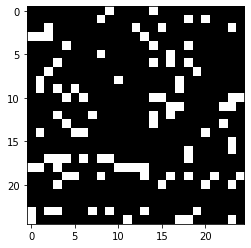

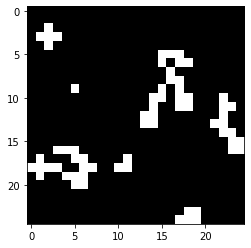

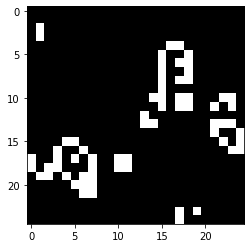

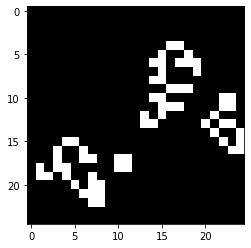

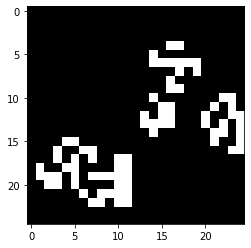

In [17]:
# lets do 5 iterations
aMat = startLifeSuper()

for k in range(5):
    plt.imshow(aMat, cmap="gray")
    plt.show()
    
    for i in range(25):
        for j in range(25):
            grimReaper((j,i))
            
    time.sleep(.5)

## Conclusion

After running the above cell a few times I've noticed a few things. Too many isolated squares results in extinction. Additionally, even if the ecosystem looks populated it can go extinct after only a few iterations. Lastly, the board loves certain isolations (like the square in the 5x5 board) which are recipes for infinite life, because, as you can see the square does not go excint. This makes sense, it follows the rules of life. In the next section we will work on reversing the game of life.